In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Step 2: Identify the high and low for Fibonacci levels
def calculate_fibonacci_levels(data):
    # Extract scalar values for highest high and lowest low
    highest_high = data['High'].max()
    lowest_low = data['Low'].min()
    diff = highest_high - lowest_low

    # Fibonacci retracement levels
    levels = {
        '0.0%': float(highest_high),
        '23.6%': float(highest_high - 0.236 * diff),
        '38.2%': float(highest_high - 0.382 * diff),
        '50.0%': float(highest_high - 0.5 * diff),
        '61.8%': float(highest_high - 0.618 * diff),
        '78.6%': float(highest_high - 0.786 * diff),
        '100.0%': float(lowest_low),
    }

    # Fibonacci extension levels
    extension_levels = {
        '127.2%': float(highest_high + 0.272 * diff),
        '161.8%': float(highest_high + 0.618 * diff),
        '261.8%': float(highest_high + 1.618 * diff),
        '423.6%': float(highest_high + 2.236 * diff),
    }

    return levels, extension_levels



In [11]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Calculate Fibonacci levels
    fib_levels, fib_extensions = calculate_fibonacci_levels(data)
    
    # Step 3: Plot the data with Fibonacci levels
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    
    # Plot Fibonacci retracement levels
    for level, value in fib_levels.items():
        plt.axhline(y=value, linestyle='--', label=f'Retracement {level}', alpha=0.7)
    
    # Plot Fibonacci extension levels
    for level, value in fib_extensions.items():
        plt.axhline(y=value, linestyle=':', label=f'Extension {level}', alpha=0.7, color='red')
    
    plt.title(f'Fibonacci Retracement and Extensions for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1043656/1622382047.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '0.0%': float(highest_high),
/tmp/ipykernel_1043656/1622382047.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '23.6%': float(highest_high - 0.236 * diff),
/tmp/ipykernel_1043656/1622382047.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '38.2%': float(highest_high - 0.382 * diff),
/tmp/ipykernel_1043656/1622382047.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  '50.0%': float(highest_high - 0.5 * diff),
/tmp/ipykernel_1043656/16

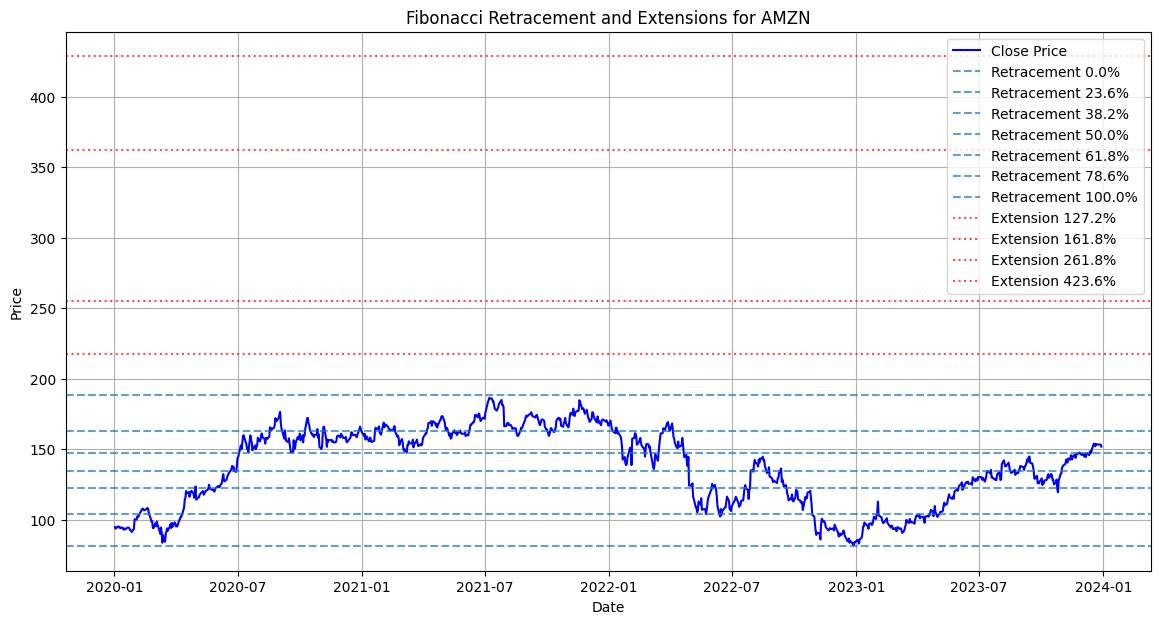

In [12]:
show_graph("AMZN")